In [7]:
import sys
import os
# Add the scripts directory to the system path
sys.path.append(r"D:\Kifya_training\Week 1\Financial-News-Sentiment-Analysis\scripts")
from data_loader import load_data
from descriptive_statistics import compute_headline_length, compute_basic_statistics, find_outliers
from visualization import plot_distribution, plot_bar



In [8]:
# Load data
file_path = r"D:\Kifya_training\Week 1\Technical  Content\Data\raw_analyst_ratings.csv"
df = load_data(file_path)



Dataset Loaded Successfully!
Columns in Dataset: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Data Types:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object


In [9]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [10]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [11]:
# Display basic statistics for numeric columns
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [12]:
# Add a column for headline length using the module
df = compute_headline_length(df)


In [13]:
# Basic statistics for headline length
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:")
print(headline_stats)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


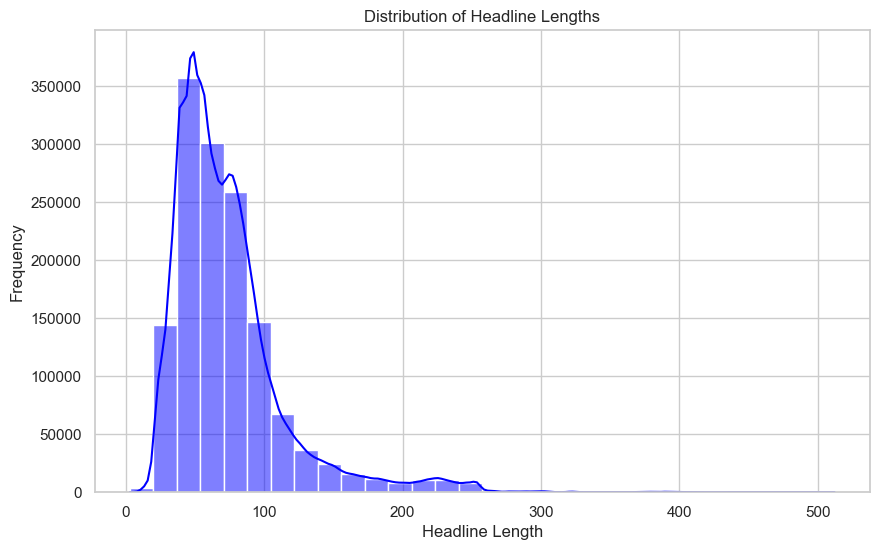

In [14]:
# Plot the distribution of headline lengths
plot_distribution(df, 'headline_length', "Distribution of Headline Lengths", "Headline Length", "Frequency")

In [15]:
# Identify outliers in the headline length
outliers = find_outliers(df, 'headline_length')
print("Headline Length Outliers:")
print(outliers[['headline', 'headline_length']])

Headline Length Outliers:
                                                  headline  headline_length
20       Shares of several healthcare companies are tra...              180
21       Shares of several healthcare companies are tra...              210
26       Shares of several companies in the auto dealer...              254
27       Shares of several healthcare companies are tra...              212
30       Int'l. Air Transport Authority Chief Economist...              187
...                                                    ...              ...
1406765  Zumiez Reports Q4 GAAP EPS $0.60, Adj. EPS $0....              180
1406776  UPDATE: Zumiez Raises Q4 EPS Guidance from $0....              160
1406828  UPDATE: Zumiez Inc. Raises Q2 EPS Guidance fro...              165
1407266  Chinese Nano-Cap Momentum Stocks Sharply Highe...              255
1407278  Auto Parts Suppliers Trading Up: China Zenix 9...              211

[68165 rows x 2 columns]


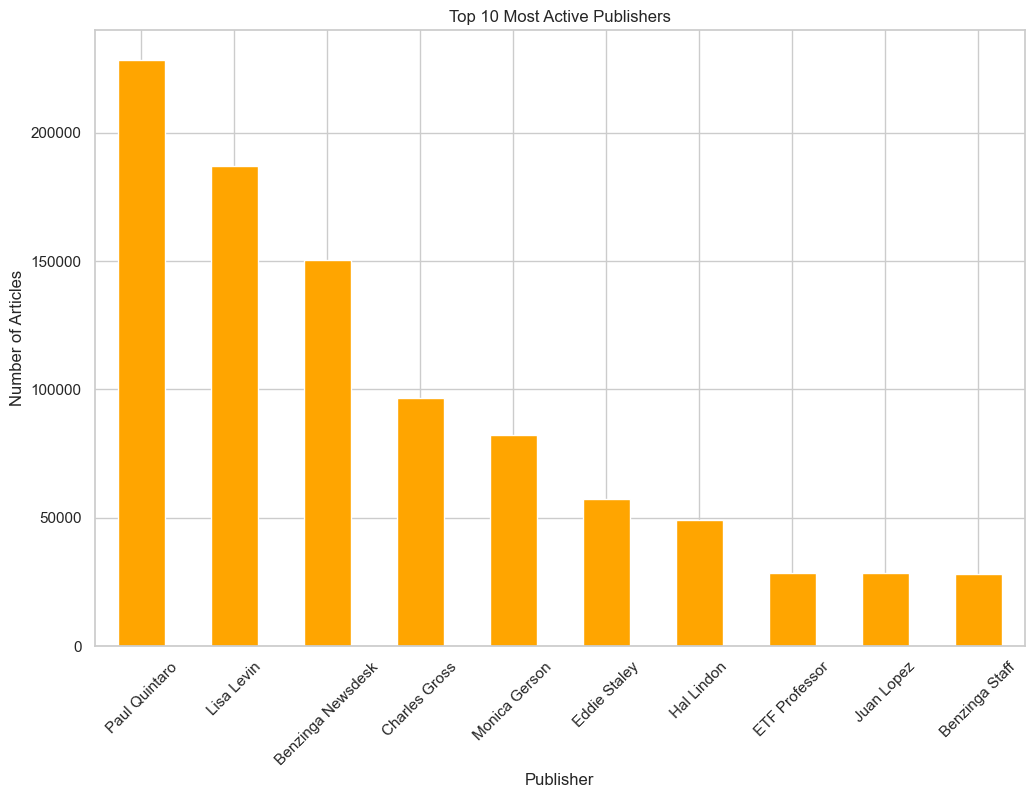

In [16]:
# Visualize the most active publishers
publisher_counts = df['publisher'].value_counts()
plot_bar(publisher_counts.head(10), "Top 10 Most Active Publishers", "Publisher", "Number of Articles")